In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

In [2]:
import pandas as pd
# Load the dataset
path="/content/drive/MyDrive/Dataset/Dataset Kaggle - Employee Future Prediction.csv"
df = pd.read_csv(path)

In [4]:
# Display the first few rows of the DataFrame
print(df.head())

   Education  JoiningYear       City  PaymentTier  Age  Gender EverBenched  \
0  Bachelors         2017  Bangalore            3   34    Male          No   
1  Bachelors         2013       Pune            1   28  Female          No   
2  Bachelors         2014  New Delhi            3   38  Female          No   
3    Masters         2016  Bangalore            3   27    Male          No   
4    Masters         2017       Pune            3   24    Male         Yes   

   ExperienceInCurrentDomain  LeaveOrNot  
0                          0           0  
1                          3           1  
2                          2           0  
3                          5           1  
4                          2           1  


In [38]:
print (df.columns)

Index(['JoiningYear', 'PaymentTier', 'Age', 'ExperienceInCurrentDomain',
       'LeaveOrNot', 'Education_Bachelors', 'Education_Masters',
       'Education_PHD', 'City_Bangalore', 'City_New Delhi', 'City_Pune',
       'Gender_Female', 'Gender_Male', 'EverBenched_No', 'EverBenched_Yes'],
      dtype='object')


In [16]:
# Identify categorical columns based on their data types
categorical_columns = ['Education_Bachelors', 'City_Pune', 'Gender_Female', 'EverBenched_Yes']
columns_to_encode = [col for col in categorical_columns if df[col].dtype == 'object']

# Perform one-hot encoding
df = pd.get_dummies(df, columns=columns_to_encode)



In [17]:
# Initialize the Naive Bayes classifier
model = GaussianNB()

In [23]:
# Split the data into features (X) and target variable (y)
X = df.drop(columns=['LeaveOrNot'])
y = df['LeaveOrNot']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the classifier using the training data
model.fit(X_train, y_train)

# Make predictions on the testing data
predictions = model.predict(X_test)

In [20]:
# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

# Display classification report
print("\nClassification Report:")
print(classification_report(y_test, predictions))

Accuracy: 0.7175080558539205

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.77      0.78       610
           1       0.58      0.63      0.60       321

    accuracy                           0.72       931
   macro avg       0.69      0.70      0.69       931
weighted avg       0.72      0.72      0.72       931



In [27]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation
cv_scores = cross_val_score(model, X, y, cv=5)
print("Cross-validation scores:", cv_scores)
print("Mean CV accuracy:", cv_scores.mean())

Cross-validation scores: [0.70784103 0.7207304  0.68421053 0.68924731 0.68602151]
Mean CV accuracy: 0.6976101544183039


In [30]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameters grid
param_grid = {'var_smoothing': [1e-9, 1e-8, 1e-7]}

# Perform grid search
grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)


Best Hyperparameters: {'var_smoothing': 1e-09}


In [31]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE for oversampling
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X, y)


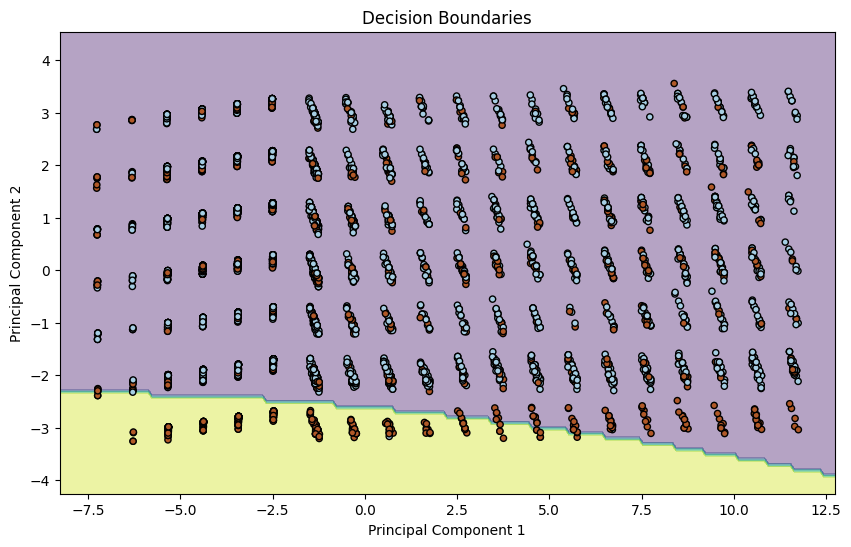

In [37]:
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
import numpy as np
import matplotlib.pyplot as plt

# Fit PCA on the entire dataset
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Create a pipeline with GaussianNB
pipeline = make_pipeline(GaussianNB())

# Fit the pipeline on the entire dataset
pipeline.fit(X_pca, y)

# Function to plot decision boundaries
def plot_decision_boundary(X, y, clf):
    # Create a mesh grid to plot decision boundaries
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))

    # Predict the class for each grid point
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot decision boundaries
    plt.contourf(xx, yy, Z, alpha=0.4)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=20, edgecolor='k', cmap=plt.cm.Paired)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.title('Decision Boundaries')

# Plot decision boundaries using the reduced features
plt.figure(figsize=(10, 6))
plot_decision_boundary(X_pca, y.values, clf=pipeline)
plt.show()

